BA data cleaning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('ba1_r.csv')

In [3]:
df.head()

,Unnamed: 0,country,date,reviews,rating
0,0,(United Kingdom),24th January 2023,✅ Trip Verified | Excellent service both on th...,3
1,1,(United Kingdom),24th January 2023,✅ Trip Verified | Good lounge at Cape Town. O...,4
2,2,(United Kingdom),23rd January 2023,✅ Trip Verified | A really excellent journey....,3
3,3,(United Kingdom),21st January 2023,✅ Trip Verified | This flight was one of the ...,1
4,4,(United States),19th January 2023,Not Verified | It seems that there is a race t...,9


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,country,date,reviews,rating
0,(United Kingdom),24th January 2023,✅ Trip Verified | Excellent service both on th...,3
1,(United Kingdom),24th January 2023,✅ Trip Verified | Good lounge at Cape Town. O...,4
2,(United Kingdom),23rd January 2023,✅ Trip Verified | A really excellent journey....,3
3,(United Kingdom),21st January 2023,✅ Trip Verified | This flight was one of the ...,1
4,(United States),19th January 2023,Not Verified | It seems that there is a race t...,9


In [6]:
df.date=pd.to_datetime(df.date)

In [7]:
df.head()

,country,date,reviews,rating
0,(United Kingdom),2023-01-24,✅ Trip Verified | Excellent service both on th...,3
1,(United Kingdom),2023-01-24,✅ Trip Verified | Good lounge at Cape Town. O...,4
2,(United Kingdom),2023-01-23,✅ Trip Verified | A really excellent journey....,3
3,(United Kingdom),2023-01-21,✅ Trip Verified | This flight was one of the ...,1
4,(United States),2023-01-19,Not Verified | It seems that there is a race t...,9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   country  3464 non-null   object        
 1   date     3464 non-null   datetime64[ns]
 2   reviews  3464 non-null   object        
 3   rating   3464 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 108.4+ KB


<AxesSubplot:>

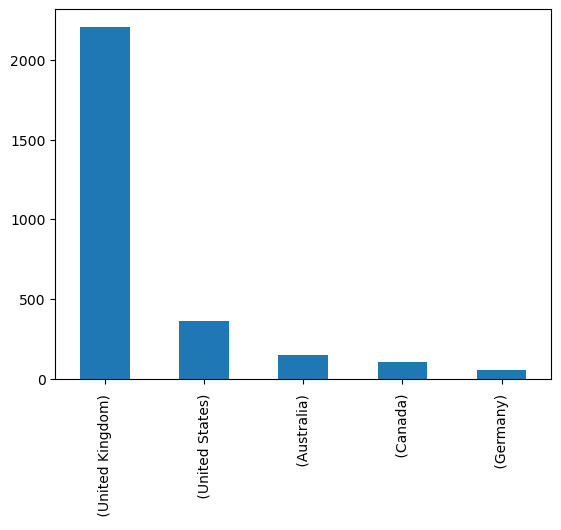

In [9]:
df['country'].value_counts().head().plot(kind='bar')

In [10]:
df.head()

,country,date,reviews,rating
0,(United Kingdom),2023-01-24,✅ Trip Verified | Excellent service both on th...,3
1,(United Kingdom),2023-01-24,✅ Trip Verified | Good lounge at Cape Town. O...,4
2,(United Kingdom),2023-01-23,✅ Trip Verified | A really excellent journey....,3
3,(United Kingdom),2023-01-21,✅ Trip Verified | This flight was one of the ...,1
4,(United States),2023-01-19,Not Verified | It seems that there is a race t...,9


In [11]:
df['verified']=df.reviews.str.contains('Trip Verified')

In [12]:
df['verified']

0        True
1        True
2        True
3        True
4       False
        ...  
3459    False
3460    False
3461    False
3462    False
3463    False
Name: verified, Length: 3464, dtype: bool

In [13]:
df.head()

,country,date,reviews,rating,verified
0,(United Kingdom),2023-01-24,✅ Trip Verified | Excellent service both on th...,3,True
1,(United Kingdom),2023-01-24,✅ Trip Verified | Good lounge at Cape Town. O...,4,True
2,(United Kingdom),2023-01-23,✅ Trip Verified | A really excellent journey....,3,True
3,(United Kingdom),2023-01-21,✅ Trip Verified | This flight was one of the ...,1,True
4,(United States),2023-01-19,Not Verified | It seems that there is a race t...,9,False


In [14]:
df.reset_index(drop=True).head()

,country,date,reviews,rating,verified
0,(United Kingdom),2023-01-24,✅ Trip Verified | Excellent service both on th...,3,True
1,(United Kingdom),2023-01-24,✅ Trip Verified | Good lounge at Cape Town. O...,4,True
2,(United Kingdom),2023-01-23,✅ Trip Verified | A really excellent journey....,3,True
3,(United Kingdom),2023-01-21,✅ Trip Verified | This flight was one of the ...,1,True
4,(United States),2023-01-19,Not Verified | It seems that there is a race t...,9,False


In [15]:
df['rating'].value_counts()

1                                743
2                                388
3                                380
8                                354
10                               310
7                                305
9                                298
4                                237
5                                226
6                                184
\n\t\t\t\t\t\t\t\t\t\t\t\t\t5     34
none                               5
Name: rating, dtype: int64

In [16]:
df['rating']=df.rating.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t")

In [17]:
df['rating'].value_counts()

1       743
2       388
3       380
8       354
10      310
7       305
9       298
5       260
4       237
6       184
none      5
Name: rating, dtype: int64

In [18]:
df.drop(df[df.rating=='none'].index,axis=0,inplace=True)

<AxesSubplot:>

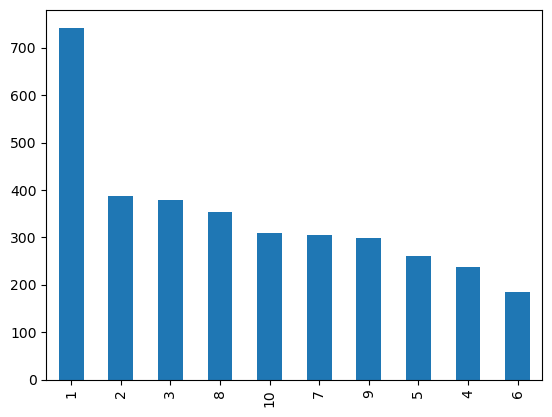

In [19]:
df['rating'].value_counts().plot(kind='bar')

In [20]:
df.rating.describe()

count     3459
unique      10
top          1
freq       743
Name: rating, dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 0 to 3463
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   country   3459 non-null   object        
 1   date      3459 non-null   datetime64[ns]
 2   reviews   3459 non-null   object        
 3   rating    3459 non-null   object        
 4   verified  3459 non-null   bool          
dtypes: bool(1), datetime64[ns](1), object(3)
memory usage: 138.5+ KB


In [22]:
df.reset_index(drop=True)

,country,date,reviews,rating,verified
0,(United Kingdom),2023-01-24,✅ Trip Verified | Excellent service both on th...,3,True
1,(United Kingdom),2023-01-24,✅ Trip Verified | Good lounge at Cape Town. O...,4,True
2,(United Kingdom),2023-01-23,✅ Trip Verified | A really excellent journey....,3,True
3,(United Kingdom),2023-01-21,✅ Trip Verified | This flight was one of the ...,1,True
4,(United States),2023-01-19,Not Verified | It seems that there is a race t...,9,False
...,...,...,...,...,...
3454,(Canada),2012-08-29,YYZ to LHR - July 2012 - I flew overnight in p...,8,False
3455,(United Kingdom),2012-08-28,LHR to HAM. Purser addresses all club passenge...,9,False
3456,(United Kingdom),2011-10-12,My son who had worked for British Airways urge...,5,False
3457,(United States),2011-10-11,London City-New York JFK via Shannon on A318 b...,4,False


In [23]:
df['rating'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3459    False
3460    False
3461    False
3462    False
3463    False
Name: rating, Length: 3459, dtype: bool

In [24]:
df['verified'].value_counts()

False    2483
True      976
Name: verified, dtype: int64

cleaning reviews

In [25]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('omw-1.4')
  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
wnl=WordNetLemmatizer()

In [27]:
r_d=df.reviews.str.strip("✅ Trip Verified |")

In [28]:
clean_review=[]
for r in r_d:
    r = re.sub('[^a-zA-Z]',' ', r)
    r = r.lower()
    r = r.split()
    r= [wnl.lemmatize(word) for word in r if word not in set(stopwords.words("english"))]
    r = " ".join(r)
    clean_review.append(r)

In [29]:
df['clean_review']=clean_review

In [30]:
df.head()

,country,date,reviews,rating,verified,clean_review
0,(United Kingdom),2023-01-24,✅ Trip Verified | Excellent service both on th...,3,True,excellent service ground board first class pro...
1,(United Kingdom),2023-01-24,✅ Trip Verified | Good lounge at Cape Town. O...,4,True,good lounge cape town time departure drink hig...
2,(United Kingdom),2023-01-23,✅ Trip Verified | A really excellent journey....,3,True,really excellent journey lounge overcrowded la...
3,(United Kingdom),2023-01-21,✅ Trip Verified | This flight was one of the ...,1,True,flight one worst ever life wanted pamper bough...
4,(United States),2023-01-19,Not Verified | It seems that there is a race t...,9,False,verified seems race bottom amongst airline can...


In [31]:
df.to_csv('BA-nlp')